In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=6103570bff4ddecc1477e6497e503c141fb84009061b51868ae596809ae5f42a
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built sklearn


In [ ]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 1. 데이터 로드 및 확인

In [ ]:
# import libraries
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import os
import numpy as np
import pandas as pd
import math, random
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('whitegrid')
from scipy import stats
import missingno as msno

# display all columns
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_row', None)

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/최종프로젝트/physionet2012_test.csv')
test_data

,Unnamed: 0,pid,rec_time,age,Gender,ICUType,ALP,ALT,AST,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,FiO2,GCS,Glucose,HCO3,HCT,HR,K,Lactate,Mg,Na,PaCO2,PaO2,Platelets,RR,SPO2,BT,Tropl,TroponinI,TropT,TroponinT,Urine,WBC,pH,MechVent,survival,SBP,DBP,MBP,male,female,surv_los,LOS
0,0,135089,0:00:00,90.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,97.0,37.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,116.0,58.0,77.0,1,0,-7,6
1,1,135089,0:44:00,90.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0,NaN,2.9,NaN,NaN,NaN,NaN,NaN,19.0,97.0,37.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,116.0,58.0,77.0,1,0,-7,6
2,2,135089,2:09:00,90.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,97.0,38.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,116.0,58.0,77.0,1,0,-7,6
3,3,135089,2:10:00,90.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,97.0,38.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,116.0,58.0,77.0,1,0,-7,6
4,4,135089,2:15:00,90.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,97.0,38.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,116.0,58.0,77.0,1,0,-7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29549,29549,135219,22:45:00,78.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,98.0,37.6,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,2011,134.0,51.0,79.0,1,0,2002,9
29550,29550,135219,22:49:00,78.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,98.0,37.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,132.0,50.0,78.0,1,0,2002,9
29551,29551,135219,23:45:00,78.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,98.0,37.7,NaN,NaN,NaN,NaN,45.0,NaN,NaN,NaN,2011,139.0,54.0,84.0,1,0,2002,9
29552,29552,135219,"1 day, 12:28:00",78.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,NaN,40.0,90.0,NaN,18.0,98.0,37.7,NaN,NaN,NaN,NaN,NaN,NaN,7.37,NaN,2011,139.0,54.0,84.0,1,0,2002,9


In [ ]:
test_data.isnull().sum()

Unnamed: 0         0
pid                0
rec_time           0
age                0
Gender             0
ICUType            0
ALP            29245
ALT            29236
AST            29236
Albumin        29325
BUN            28151
Bilirubin      29237
Cholesterol    29532
Creatinine     28142
FiO2           26405
GCS            23446
Glucose        28261
HCO3           28175
HCT            27773
HR                 0
K              28104
Lactate        28802
Mg             28204
Na             28176
PaCO2          27251
PaO2           27252
Platelets      28164
RR                 0
SPO2               0
BT                 0
Tropl          29554
TroponinI      29528
TropT          29554
TroponinT      29345
Urine          16335
WBC            28288
pH             27162
MechVent       26489
survival           0
SBP                0
DBP                0
MBP                0
male               0
female             0
surv_los           0
LOS                0
dtype: int64

In [ ]:
# load data
train_data = pd.read_csv('/content/drive/MyDrive/최종프로젝트/physionet2012_train.csv')
valid_data = pd.read_csv('/content/drive/MyDrive/최종프로젝트/physionet2012_valid.csv')
test_data = pd.read_csv('/content/drive/MyDrive/최종프로젝트/physionet2012_test.csv')

train_data.drop(['Unnamed: 0'], axis=1, inplace=True)
valid_data.drop(['Unnamed: 0'], axis=1, inplace=True)
test_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242613 entries, 0 to 242612
Data columns (total 45 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   pid          242613 non-null  int64  
 1   rec_time     242613 non-null  object 
 2   age          242613 non-null  float64
 3   Gender       242613 non-null  float64
 4   ICUType      242613 non-null  float64
 5   ALP          2480 non-null    float64
 6   ALT          2549 non-null    float64
 7   AST          2552 non-null    float64
 8   Albumin      1892 non-null    float64
 9   BUN          11220 non-null   float64
 10  Bilirubin    2551 non-null    float64
 11  Cholesterol  273 non-null     float64
 12  Creatinine   11274 non-null   float64
 13  FiO2         26127 non-null   float64
 14  GCS          49959 non-null   float64
 15  Glucose      10513 non-null   float64
 16  HCO3         10972 non-null   float64
 17  HCT          14762 non-null   float64
 18  HR           242613 non-

In [ ]:
# labeling
# train_data
train_data['label'] = 0
train_data.loc[(2 <= train_data['survival'])&(train_data['survival'] <= train_data['LOS']), 'label'] = 1
train_data.loc[train_data['survival'] > train_data['LOS'], 'label'] = 0
train_data.loc[train_data['survival'] == -1, 'label'] = 0

# valid_data
valid_data['label'] = 0
valid_data.loc[(2 <= valid_data['survival'])&(valid_data['survival'] <= valid_data['LOS']), 'label'] = 1
valid_data.loc[valid_data['survival'] > valid_data['LOS'], 'label'] = 0
valid_data.loc[valid_data['survival'] == -1, 'label'] = 0

# test_data
test_data['label'] = 0
test_data.loc[(2 <= test_data['survival'])&(test_data['survival'] <= test_data['LOS']), 'label'] = 1
test_data.loc[test_data['survival'] > test_data['LOS'], 'label'] = 0
test_data.loc[test_data['survival'] == -1, 'label'] = 0

In [ ]:
train_df = train_data.copy()
valid_df = valid_data.copy()
test_df = test_data.copy()

# 2. 결측값 처리

In [ ]:
# ffill
train_df.groupby(['pid']).fillna(method='ffill', inplace=True)
valid_df.groupby(['pid']).fillna(method='ffill', inplace=True)
test_df.groupby(['pid']).fillna(method='ffill', inplace=True)

# median
train_df.fillna(train_df.median(), inplace=True)
valid_df.fillna(valid_df.median(), inplace=True)
test_df.fillna(test_df.median(), inplace=True)

# 3. 데이터 확인

In [ ]:
train_df.describe()

,pid,age,Gender,ICUType,ALP,ALT,AST,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,FiO2,GCS,Glucose,HCO3,HCT,HR,K,Lactate,Mg,Na,PaCO2,PaO2,Platelets,RR,SPO2,BT,Tropl,TroponinI,TropT,TroponinT,Urine,WBC,pH,MechVent,survival,SBP,DBP,MBP,male,female,surv_los,LOS,label
count,242613.000000,242613.000000,242613.000000,242613.000000,242613.000000,242613.000000,242613.000000,242613.000000,242613.000000,242613.000000,242613.000000,242613.000000,242613.000000,242613.000000,242613.000000,242613.000000,242613.000000,242613.000000,242613.000000,242613.000000,242613.000000,242613.000000,242613.000000,242613.000000,242613.000000,242613.000000,242613.000000,242613.000000,0.0,242613.000000,0.0,242613.000000,242613.000000,242613.000000,242613.000000,242613.0,242613.000000,242613.000000,242613.000000,242613.000000,242613.0,242613.0,242613.000000,242613.000000,242613.000000
mean,137598.163227,64.660979,0.567748,2.721355,82.363727,46.252200,67.431234,2.900154,20.333844,0.920969,154.004942,1.023582,0.504850,12.674613,127.632637,23.004035,30.325126,87.772782,4.101816,2.121667,2.001087,139.001224,39.113103,124.225732,173.877780,19.154167,96.883451,36.977602,NaN,2.907237,NaN,0.227553,92.485370,11.549491,7.389980,1.0,127.016673,116.577113,58.631030,79.120566,1.0,0.0,112.964009,14.052664,0.140553
std,2895.568188,17.069362,0.497176,1.003291,14.178149,112.848326,159.476285,0.057804,5.217707,0.636930,1.526859,0.375091,0.063831,1.906861,14.596424,1.008024,1.249393,18.031186,0.155843,0.433795,0.086192,1.083102,2.547023,26.050993,23.496668,2.419724,2.256985,1.490571,NaN,0.443048,NaN,0.254353,124.691656,1.506942,2.593948,0.0,361.568613,22.507286,12.065476,15.948036,0.0,0.0,361.025804,12.713974,0.347561
min,132540.000000,15.000000,-1.000000,1.000000,12.000000,1.000000,5.000000,1.000000,0.000000,0.100000,28.000000,0.100000,0.210000,3.000000,10.000000,5.000000,10.300000,0.000000,1.800000,0.300000,0.600000,98.000000,0.300000,0.000000,6.000000,10.000000,26.000000,-17.800000,NaN,0.300000,NaN,0.010000,0.000000,0.100000,1.000000,1.0,-1.000000,0.000000,0.000000,0.000000,1.0,0.0,-105.000000,-1.000000,0.000000
25%,135127.000000,53.000000,0.000000,2.000000,82.000000,43.000000,63.000000,2.900000,20.000000,0.900000,154.000000,1.000000,0.500000,13.000000,127.000000,23.000000,30.300000,76.000000,4.100000,2.100000,2.000000,139.000000,39.000000,122.000000,173.000000,19.000000,97.000000,36.500000,NaN,2.900000,NaN,0.220000,70.000000,11.500000,7.380000,1.0,-1.000000,108.000000,54.000000,73.000000,1.0,0.0,-13.000000,6.000000,0.000000
50%,137594.000000,67.000000,1.000000,3.000000,82.000000,43.000000,63.000000,2.900000,20.000000,0.900000,154.000000,1.000000,0.500000,13.000000,127.000000,23.000000,30.300000,86.000000,4.100000,2.100000,2.000000,139.000000,39.000000,122.000000,173.000000,19.000000,97.000000,37.100000,NaN,2.900000,NaN,0.220000,70.000000,11.500000,7.380000,1.0,-1.000000,116.000000,58.000000,77.000000,1.0,0.0,-7.000000,10.000000,0.000000
75%,140031.000000,78.000000,1.000000,4.000000,82.000000,43.000000,63.000000,2.900000,20.000000,0.900000,154.000000,1.000000,0.500000,13.000000,127.000000,23.000000,30.300000,98.000000,4.100000,2.100000,2.000000,139.000000,39.000000,122.000000,173.000000,19.000000,97.000000,37.600000,NaN,2.900000,NaN,0.220000,70.000000,11.500000,7.380000,1.0,15.000000,124.000000,62.000000,83.000000,1.0,0.0,-1.000000,17.000000,0.000000
max,142671.000000,90.000000,1.000000,4.000000,2205.000000,11470.000000,18430.000000,5.000000,197.000000,47.700000,330.000000,22.100000,1.000000,15.000000,1143.000000,50.000000,61.800000,300.000000,22.900000,29.300000,7.700000,177.000000,100.000000,500.000000,1047.000000,39.000000,100.000000,42.100000,NaN,49.200000,NaN,24.910000,11000.000000,187.500000,735.000000,1.0,2600.000000,295.000000,268.000000,300.000000,1.0,0.0,2547.000000,154.000000,1.000000


In [ ]:
train_df.isnull().sum()

pid                 0
rec_time            0
age                 0
Gender              0
ICUType             0
ALP                 0
ALT                 0
AST                 0
Albumin             0
BUN                 0
Bilirubin           0
Cholesterol         0
Creatinine          0
FiO2                0
GCS                 0
Glucose             0
HCO3                0
HCT                 0
HR                  0
K                   0
Lactate             0
Mg                  0
Na                  0
PaCO2               0
PaO2                0
Platelets           0
RR                  0
SPO2                0
BT                  0
Tropl          242613
TroponinI           0
TropT          242613
TroponinT           0
Urine               0
WBC                 0
pH                  0
MechVent            0
survival            0
SBP                 0
DBP                 0
MBP                 0
male                0
female              0
surv_los            0
LOS                 0
label     

In [ ]:
train_df['label'].value_counts()

0    208513
1     34100
Name: label, dtype: int64

In [ ]:
train_df

,pid,rec_time,age,Gender,ICUType,ALP,ALT,AST,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,FiO2,GCS,Glucose,HCO3,HCT,HR,K,Lactate,Mg,Na,PaCO2,PaO2,Platelets,RR,SPO2,BT,Tropl,TroponinI,TropT,TroponinT,Urine,WBC,pH,MechVent,survival,SBP,DBP,MBP,male,female,surv_los,LOS,label
0,142219,0:00:00,52.0,0.0,3.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.5,13.0,127.0,23.0,30.3,86.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,97.0,37.1,NaN,2.9,NaN,0.22,70.0,11.5,7.38,1.0,-1,116.0,58.0,77.0,1,0,-8,7,0
1,142219,0:44:00,52.0,0.0,3.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.8,13.0,127.0,23.0,30.3,103.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,97.0,37.1,NaN,2.9,NaN,0.22,500.0,11.5,7.38,1.0,-1,116.0,58.0,77.0,1,0,-8,7,0
2,142219,1:14:00,52.0,0.0,3.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.5,13.0,127.0,23.0,30.3,100.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,97.0,37.1,NaN,2.9,NaN,0.22,70.0,11.5,7.38,1.0,-1,0.0,0.0,224.0,1,0,-8,7,0
3,142219,1:44:00,52.0,0.0,3.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.5,13.0,127.0,23.0,30.3,106.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,97.0,37.1,NaN,2.9,NaN,0.22,70.0,11.5,7.38,1.0,-1,0.0,0.0,135.0,1,0,-8,7,0
4,142219,1:54:00,52.0,0.0,3.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.5,13.0,127.0,23.0,30.3,105.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,97.0,37.1,NaN,2.9,NaN,0.22,450.0,11.5,7.38,1.0,-1,217.0,108.0,133.0,1,0,-8,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242608,138581,"1 day, 20:36:00",53.0,1.0,4.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.4,8.0,127.0,23.0,30.3,85.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,100.0,36.9,NaN,2.9,NaN,0.22,80.0,11.5,7.38,1.0,17,114.0,65.0,84.0,1,0,-1,18,1
242609,138581,"1 day, 21:36:00",53.0,1.0,4.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.5,13.0,127.0,23.0,30.3,83.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,100.0,36.9,NaN,2.9,NaN,0.22,40.0,11.5,7.38,1.0,17,111.0,61.0,80.0,1,0,-1,18,1
242610,138581,"1 day, 22:36:00",53.0,1.0,4.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.5,13.0,127.0,23.0,30.3,83.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,100.0,36.9,NaN,2.9,NaN,0.22,45.0,11.5,7.38,1.0,17,109.0,62.0,80.0,1,0,-1,18,1
242611,138581,"1 day, 23:36:00",53.0,1.0,4.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.5,13.0,127.0,23.0,30.3,85.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,100.0,36.9,NaN,2.9,NaN,0.22,50.0,11.5,7.38,1.0,17,111.0,63.0,80.0,1,0,-1,18,1


In [ ]:
# 0:여성 1:남성
train_df['Gender'].unique()

array([ 0.,  1., -1.])

In [ ]:
train_df[train_df['Gender']==-1]['pid'].unique()
# 남자...?
# 141486 -> male:1 female:0
# 137392 -> male:1 female:0
# 135757 -> male:1 female:0

array([141486, 137392, 135757])

In [ ]:
# Gender -1값 1로 바꾸기
train_df.loc[train_df['Gender']==-1, 'Gender'] = 1 

In [ ]:
# 1:관상동맥 2:심장 3:내과 4:외과
train_df['ICUType'].unique()

array([3., 4., 2., 1.])

# 4. 데이터 시각화 

In [ ]:
train_df['label'].value_counts()/len(train_df.index)

0    0.859447
1    0.140553
Name: label, dtype: float64

In [ ]:
train_df[train_df['label']==1]['ICUType'].value_counts()/(train_df[train_df['label']==1]['ICUType'].value_counts()+train_df[train_df['label']==0]['ICUType'].value_counts())

1.0    0.167024
2.0    0.050572
3.0    0.186448
4.0    0.159788
Name: ICUType, dtype: float64

In [ ]:
# categorical data
def bar_chart(feature, ax=None):
    dead = train_df[train_df['label']==1][feature].value_counts() 
    survived = train_df[train_df['label']==0][feature].value_counts()
    df = pd.DataFrame([dead, survived])
    df.index = ['Dead', 'Survived']
    df.plot(kind='bar', stacked=True, ax=ax)

# numerical data(facets)
def draw_facetgrid(feature):
    facet = sns.FacetGrid(train_df, hue='label', aspect=5)
    facet.map(sns.kdeplot, feature, shade=True)
    facet.set(xlim=(0, train_df[feature].max()))
    facet.add_legend()
    plt.show()

In [ ]:
def count_plot(column, ax):
    sns.countplot(x=column, hue='label', data=train_df, ax=ax)

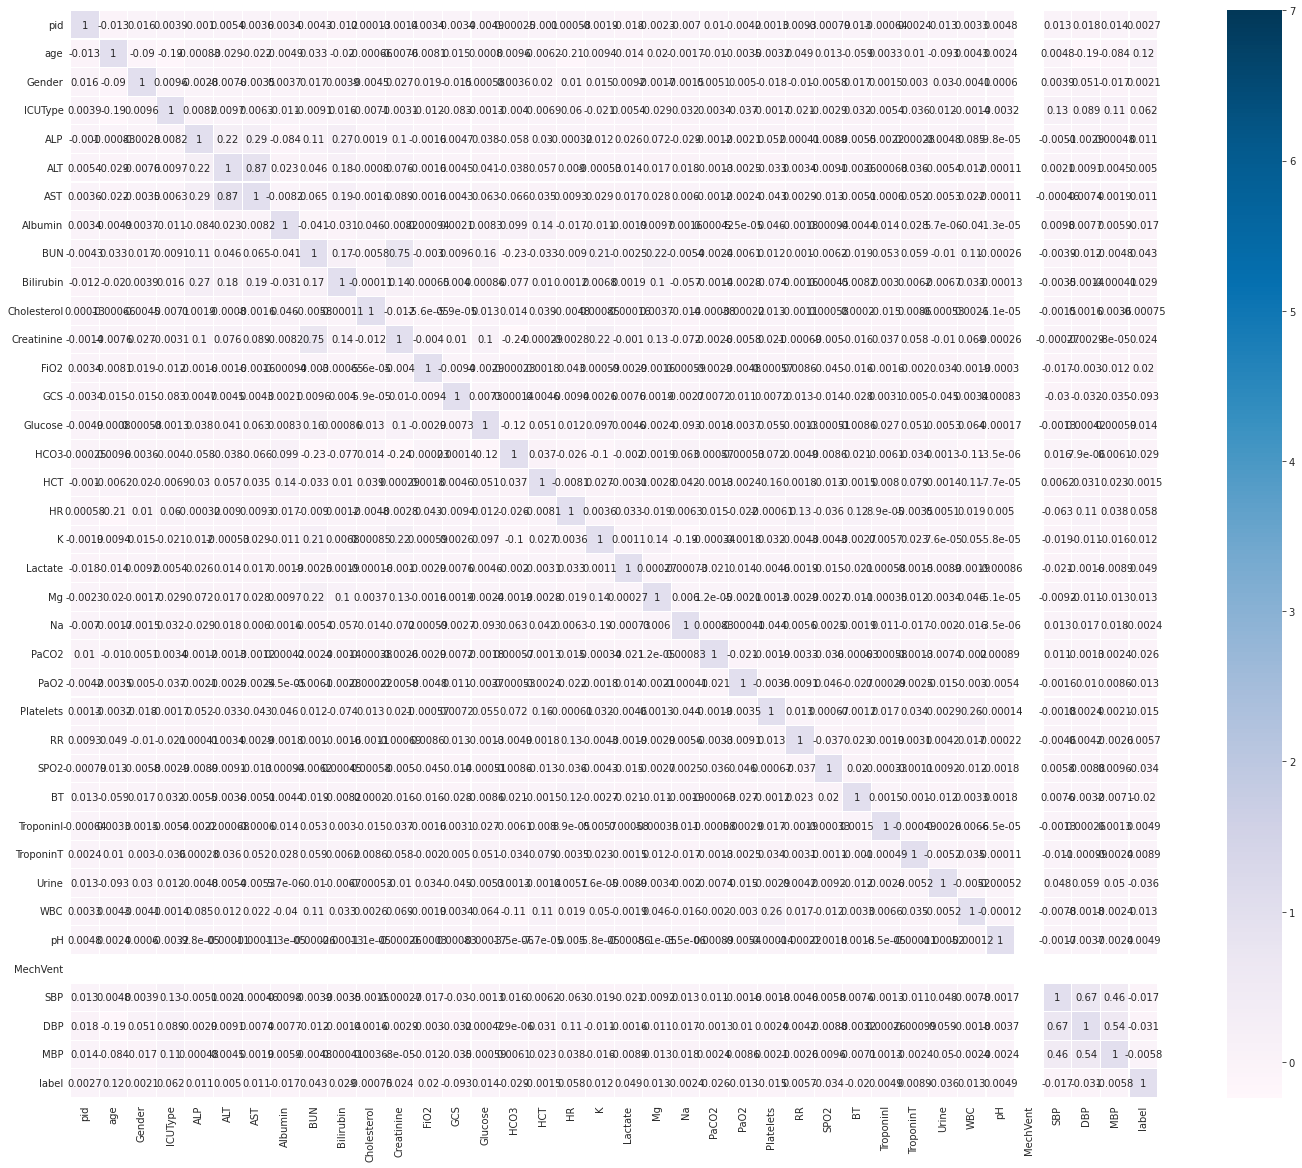

In [ ]:
corr_map = train_df[train_df.columns].corr()
color_map = plt.cm.PuBu

plt.figure(figsize=(25, 20))
sns.heatmap(corr_map, cmap = color_map, linewidths = 0.1, vmax =7, square = True, linecolor = "white", annot = True)

# 5. 스케일링

In [ ]:
n_cols = [x for x in train_df.columns if x not in ['pid', 'Gender', 'ICUType', 'MechVent', 'rec_time', 'Tropl', 'TropT', 'male', 'female', 'survival', 'surv_los', 'LOS', 'label']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_df[n_cols])
scaled_train = scaler.transform(train_df[n_cols])
scaled_valid = scaler.transform(valid_df[n_cols])
scaled_test = scaler.transform(test_df[n_cols])
# scaled_train_df = pd.DataFrame(data=scaled_train, columns=ordinary_train.feature_names)

In [ ]:
train_df2 = train_df.copy()
valid_df2 = valid_df.copy()
test_df2 = test_df.copy()

In [ ]:
train_df2[n_cols] = scaled_train
valid_df2[n_cols] = scaled_valid
test_df2[n_cols] = scaled_test

# 6. 데이터 패딩

In [ ]:
gr_train_df = train_df.groupby('pid')
gr_valid_df = valid_df.groupby('pid')
gr_test_df = test_df.groupby('pid')

In [ ]:
gr_train_df.size()
gr_valid_df.size()
gr_test_df.size()

pid
132551    94
132567    75
132570    46
132582    66
132584    94
          ..
142561    88
142573    62
142576    90
142595    45
142641    48
Length: 400, dtype: int64

In [ ]:
min(gr_train_df.size())

1

In [ ]:
len(train_df['pid'].unique())

3240

In [ ]:
len(valid_df['pid'].unique())

360

In [ ]:
len(test_df['pid'].unique())

400

In [ ]:
train_df[train_df['pid']==142219][:70]

,pid,age,Gender,ICUType,ALP,ALT,AST,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,FiO2,GCS,Glucose,HCO3,HCT,HR,K,Lactate,Mg,Na,PaCO2,PaO2,Platelets,RR,SPO2,BT,TroponinI,TroponinT,Urine,WBC,pH,MechVent,SBP,DBP,MBP,label
0,142219,52.0,0.0,3.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.5,13.0,127.0,23.0,30.3,86.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,97.0,37.1,2.9,0.22,70.0,11.5,7.38,1.0,116.0,58.0,77.0,0
1,142219,52.0,0.0,3.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.8,13.0,127.0,23.0,30.3,103.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,97.0,37.1,2.9,0.22,500.0,11.5,7.38,1.0,116.0,58.0,77.0,0
2,142219,52.0,0.0,3.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.5,13.0,127.0,23.0,30.3,100.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,97.0,37.1,2.9,0.22,70.0,11.5,7.38,1.0,0.0,0.0,224.0,0
3,142219,52.0,0.0,3.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.5,13.0,127.0,23.0,30.3,106.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,97.0,37.1,2.9,0.22,70.0,11.5,7.38,1.0,0.0,0.0,135.0,0
4,142219,52.0,0.0,3.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.5,13.0,127.0,23.0,30.3,105.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,97.0,37.1,2.9,0.22,450.0,11.5,7.38,1.0,217.0,108.0,133.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,142219,52.0,0.0,3.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.5,13.0,127.0,23.0,30.3,70.0,4.1,2.1,2.0,139.0,43.0,85.0,173.0,19.0,97.0,37.3,2.9,0.22,70.0,11.5,7.38,1.0,91.0,47.0,64.0,0
66,142219,52.0,0.0,3.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.5,10.0,127.0,23.0,30.3,66.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,97.0,37.3,2.9,0.22,20.0,11.5,7.38,1.0,91.0,45.0,62.0,0
67,142219,52.0,0.0,3.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.5,13.0,127.0,23.0,30.3,69.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,97.0,37.3,2.9,0.22,70.0,11.5,7.38,1.0,99.0,50.0,67.0,0
68,142219,52.0,0.0,3.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.5,11.0,127.0,23.0,30.3,71.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,97.0,37.3,2.9,0.22,35.0,11.5,7.38,1.0,101.0,52.0,69.0,0


### 패딩

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
def get_padded_df(df):
    padded_df = []
    p = df['pid'].unique()
    max_len = 70
    for ep in tqdm(p):
        if len(df[df['pid']==ep]) >= max_len:
            ep_df = df[df['pid']==ep][:max_len]
            padded_df.append(ep_df)
        else:
            empty_df = pd.DataFrame(index=range(0,70), columns = df.columns) 
            empty_df[['pid']] = ep
            empty_df[['age']] = df[df['pid']==ep]['age'].values[0]
            empty_df[['Gender']] = df[df['pid']==ep]['Gender'].values[0]
            empty_df[['ICUType']] = df[df['pid']==ep]['ICUType'].values[0]
            empty_df[['label']] = df[df['pid']==ep]['label'].values[0]
            empty_df.iloc[-len(df[df['pid']==ep]):] = df[df['pid']==ep]
            empty_df.fillna(0, inplace=True)
            padded_df.append(empty_df)
    return pd.concat(padded_df).reset_index(drop=True)

In [ ]:
pad_train_df = get_padded_df(train_df2)
pad_valid_df = get_padded_df(valid_df2)
pad_test_df = get_padded_df(test_df2)

  0%|          | 0/3240 [00:00<?, ?it/s]

  0%|          | 0/360 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

In [ ]:
pad_train_df

,pid,age,Gender,ICUType,ALP,ALT,AST,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,FiO2,GCS,Glucose,HCO3,HCT,HR,K,Lactate,Mg,Na,PaCO2,PaO2,Platelets,RR,SPO2,BT,TroponinI,TroponinT,Urine,WBC,pH,MechVent,SBP,DBP,MBP,label
0,142219,52.0,0.0,3.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.5,13.0,127.0,23.0,30.3,86.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,97.0,37.1,2.9,0.22,70.0,11.5,7.38,1.0,116.0,58.0,77.0,0
1,142219,52.0,0.0,3.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.8,13.0,127.0,23.0,30.3,103.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,97.0,37.1,2.9,0.22,500.0,11.5,7.38,1.0,116.0,58.0,77.0,0
2,142219,52.0,0.0,3.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.5,13.0,127.0,23.0,30.3,100.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,97.0,37.1,2.9,0.22,70.0,11.5,7.38,1.0,0.0,0.0,224.0,0
3,142219,52.0,0.0,3.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.5,13.0,127.0,23.0,30.3,106.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,97.0,37.1,2.9,0.22,70.0,11.5,7.38,1.0,0.0,0.0,135.0,0
4,142219,52.0,0.0,3.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.5,13.0,127.0,23.0,30.3,105.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,97.0,37.1,2.9,0.22,450.0,11.5,7.38,1.0,217.0,108.0,133.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242606,138581,53.0,1.0,4.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.5,13.0,127.0,23.0,30.3,93.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,100.0,37.2,2.9,0.22,42.0,11.5,7.38,1.0,118.0,66.0,85.0,1
242607,138581,53.0,1.0,4.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.5,13.0,127.0,23.0,30.3,94.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,100.0,37.2,2.9,0.22,110.0,11.5,7.38,1.0,129.0,71.0,93.0,1
242608,138581,53.0,1.0,4.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.4,8.0,127.0,23.0,30.3,85.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,100.0,36.9,2.9,0.22,80.0,11.5,7.38,1.0,114.0,65.0,84.0,1
242609,138581,53.0,1.0,4.0,82.0,43.0,63.0,2.9,20.0,0.9,154.0,1.0,0.5,13.0,127.0,23.0,30.3,83.0,4.1,2.1,2.0,139.0,39.0,122.0,173.0,19.0,100.0,36.9,2.9,0.22,40.0,11.5,7.38,1.0,111.0,61.0,80.0,1


In [ ]:
pad_valid_df

,pid,age,Gender,ICUType,ALP,ALT,AST,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,FiO2,GCS,Glucose,HCO3,HCT,HR,K,Lactate,Mg,Na,PaCO2,PaO2,Platelets,RR,SPO2,BT,TroponinI,TroponinT,Urine,WBC,pH,MechVent,SBP,DBP,MBP,label
0,140073,26.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0
1,140073,26.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0
2,140073,26.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0
3,140073,26.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0
4,140073,26.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27082,137443,71.0,1.0,1.0,87.0,42.5,64.0,2.9,20.0,1.0,137.5,1.0,0.5,13.0,127.0,23.0,30.1,84.0,4.1,2.0,2.0,139.0,39.0,121.0,167.0,19.0,97.0,36.8,1.8,0.13,70.0,11.2,7.39,1.0,110.0,65.0,82.0,0
27083,137443,71.0,1.0,1.0,87.0,42.5,64.0,2.9,20.0,1.0,137.5,1.0,0.5,15.0,127.0,23.0,30.1,83.0,4.1,2.0,2.0,139.0,39.0,121.0,167.0,15.0,97.0,36.6,1.8,0.13,120.0,11.2,7.39,1.0,110.0,65.0,82.0,0
27084,137443,71.0,1.0,1.0,87.0,42.5,64.0,2.9,20.0,1.0,137.5,1.0,0.5,13.0,127.0,23.0,30.1,87.0,4.1,2.0,2.0,139.0,39.0,121.0,167.0,19.0,97.0,36.6,1.8,0.13,70.0,11.2,7.39,1.0,110.0,65.0,82.0,0
27085,137443,71.0,1.0,1.0,87.0,42.5,64.0,2.9,20.0,1.0,137.5,1.0,0.5,13.0,127.0,23.0,30.1,79.0,4.1,2.0,2.0,139.0,39.0,121.0,167.0,21.0,97.0,36.6,1.8,0.13,285.0,11.2,7.39,1.0,110.0,65.0,82.0,0


In [ ]:
pad_test_df

,pid,age,Gender,ICUType,ALP,ALT,AST,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,FiO2,GCS,Glucose,HCO3,HCT,HR,K,Lactate,Mg,Na,PaCO2,PaO2,Platelets,RR,SPO2,BT,TroponinI,TroponinT,Urine,WBC,pH,MechVent,SBP,DBP,MBP,label
0,135089,90.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0
1,135089,90.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0
2,135089,90.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0
3,135089,90.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0
4,135089,90.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,135219,78.0,0.0,4.0,85.0,45.0,72.0,2.9,20.0,0.8,143.5,1.0,0.5,14.0,127.0,23.0,30.4,59.0,4.0,2.0,2.0,139.0,40.0,118.0,170.5,22.0,98.0,37.6,2.6,0.18,35.0,11.0,7.38,1.0,134.0,51.0,79.0,0
66,135219,78.0,0.0,4.0,85.0,45.0,72.0,2.9,20.0,0.8,143.5,1.0,0.5,14.0,127.0,23.0,30.4,60.0,4.0,2.0,2.0,139.0,40.0,118.0,170.5,22.0,98.0,37.6,2.6,0.18,75.0,11.0,7.38,1.0,132.0,50.0,78.0,0
67,135219,78.0,0.0,4.0,85.0,45.0,72.0,2.9,20.0,0.8,143.5,1.0,0.5,14.0,127.0,23.0,30.4,66.0,4.0,2.0,2.0,139.0,40.0,118.0,170.5,18.0,98.0,37.7,2.6,0.18,45.0,11.0,7.38,1.0,139.0,54.0,84.0,0
68,135219,78.0,0.0,4.0,85.0,45.0,72.0,2.9,20.0,0.8,143.5,1.0,0.5,14.0,127.0,23.0,30.4,66.0,4.0,2.0,2.0,139.0,40.0,90.0,170.5,18.0,98.0,37.7,2.6,0.18,75.0,11.0,7.37,1.0,139.0,54.0,84.0,0


In [ ]:
pad_train_df.isnull().sum()

pid            0
age            0
Gender         0
ICUType        0
ALP            0
ALT            0
AST            0
Albumin        0
BUN            0
Bilirubin      0
Cholesterol    0
Creatinine     0
FiO2           0
GCS            0
Glucose        0
HCO3           0
HCT            0
HR             0
K              0
Lactate        0
Mg             0
Na             0
PaCO2          0
PaO2           0
Platelets      0
RR             0
SPO2           0
BT             0
TroponinI      0
TroponinT      0
Urine          0
WBC            0
pH             0
MechVent       0
SBP            0
DBP            0
MBP            0
label          0
dtype: int64

# 원핫인코딩(범주형)

In [ ]:
ohe_train_df = pd.get_dummies(pad_train_df, columns=['Gender', 'ICUType', 'MechVent'])
ohe_valid_df = pd.get_dummies(pad_valid_df, columns=['Gender', 'ICUType', 'MechVent'])
ohe_test_df = pd.get_dummies(pad_test_df, columns=['Gender', 'ICUType', 'MechVent'])

In [ ]:
ohe_train_df = ohe_train_df.astype('float')
ohe_valid_df = ohe_valid_df.astype('float')
ohe_test_df = ohe_test_df.astype('float')

In [ ]:
prepro_train = ohe_train_df.copy()
prepro_valid = ohe_valid_df.copy()
prepro_test = ohe_test_df.copy()

In [ ]:
# prepro_train.to_csv('/content/drive/MyDrive/최종프로젝트/preprocessed_train_first.csv')
# prepro_valid.to_csv('/content/drive/MyDrive/최종프로젝트/preprocessed_valid_first.csv')
# prepro_test.to_csv('/content/drive/MyDrive/최종프로젝트/preprocessed_test_first.csv')

# 8. 모델링

In [ ]:
# load data
prepro_train = pd.read_csv('/content/drive/MyDrive/최종프로젝트/preprocessed_train_first.csv')
prepro_valid = pd.read_csv('/content/drive/MyDrive/최종프로젝트/preprocessed_valid_first.csv')
prepro_test = pd.read_csv('/content/drive/MyDrive/최종프로젝트/preprocessed_test_first.csv')

prepro_train.drop(['Unnamed: 0'], axis=1, inplace=True)
prepro_valid.drop(['Unnamed: 0'], axis=1, inplace=True)
prepro_test.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
input_cols = [x for x in prepro_train.columns if x not in ['pid', 'rec_time', 'Tropl', 'TropT', 'male', 'female', 'survival', 'surv_los', 'LOS', 'label']]

In [ ]:
# splitting dataset(original +delta)
train_X = prepro_train[input_cols].values
train_y = prepro_train['label'].values

valid_X = prepro_valid[input_cols].values
valid_y = prepro_valid['label'].values

test_X = prepro_test[input_cols].values
test_y = prepro_test['label'].values

# type
train_X = train_X.astype(float)
train_y = train_y.astype(int)

valid_X = valid_X.astype(float)
valid_y = valid_y.astype(int)

test_X = test_X.astype(float)
test_y = test_y.astype(int)

In [ ]:
print(train_X.shape, train_y.shape)

(226800, 41) (226800,)


In [ ]:
train_y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
242606    1.0
242607    1.0
242608    1.0
242609    1.0
242610    1.0
Name: label, Length: 226800, dtype: float64

In [ ]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [ ]:
# imbalanced-learn 패키지
from imblearn.over_sampling import *
from imblearn.over_sampling import SMOTE

# 검증 데이터나 테스트 데이터가 아닌 학습데이터에서만 오버샘플링 사용할 것
# smote = SMOTE(random_state=0)
train_X_over, train_y_over = SMOTE(random_state=0).fit_resample(train_X, train_y)

In [ ]:
# reshape
print(train_X_over.shape, train_y_over.shape)
print(valid_X.shape, valid_y.shape)
print(test_X.shape, test_y.shape)

max_len = 70

train_X_3d = train_X_over.reshape(-1, max_len, train_X_over.shape[-1])
train_y_3d = train_y_over[::70]
valid_X_3d = valid_X.reshape(-1, max_len, valid_X.shape[-1])
valid_y_3d = valid_y[::70]
test_X_3d = test_X.reshape(-1, max_len, test_X.shape[-1])
test_y_3d = test_y[::70]

print(train_X_3d.shape, train_y_3d.shape)
print(valid_X_3d.shape, valid_y_3d.shape)
print(test_X_3d.shape, test_y_3d.shape)

(393820, 18) (393820,)
(25200, 18) (25200,)
(28000, 18) (28000,)
(5626, 70, 18) (5626,)
(360, 70, 18) (360,)
(400, 70, 18) (400,)


In [ ]:
feature_dim = train_X_over.shape[-1]

In [ ]:
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential             
from keras.layers import Dense, Dropout, BatchNormalization, SimpleRNN, LSTM, Bidirectional, BatchNormalization, Activation, GRU
from keras.callbacks import EarlyStopping 
from keras.optimizers import RMSprop, Adam
from tensorflow.keras import models
from tensorflow.keras import layers

from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical

In [ ]:
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Dense, Activation, Flatten, Dropout
from keras.layers import SimpleRNN, LSTM, GRU

In [ ]:
# RNN
rnn_model = Sequential()
rnn_model.add(SimpleRNN(128, input_shape = (41, 1), return_sequences=True, activation='relu'))
rnn_model.add(Dropout(0.5)) 
rnn_model.add(SimpleRNN(256, return_sequences=True, activation="relu"))
rnn_model.add(Dropout(0.25)) 
rnn_model.add(SimpleRNN(128, return_sequences=True, activation="relu"))
rnn_model.add(Dropout(0.25)) 
rnn_model.add(SimpleRNN(64, return_sequences=True, activation="relu"))
rnn_model.add(Dropout(0.2)) 
rnn_model.add(Flatten())
rnn_model.add(Dense(1, activation='sigmoid'))
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
# LSTM
lstm_model = Sequential()
lstm_model.add(LSTM(128, input_shape = (41, 1), return_sequences=True, activation='relu'))
lstm_model.add(Dropout(0.5)) 
lstm_model.add(LSTM(256, return_sequences=True, activation="relu"))
lstm_model.add(Dropout(0.25)) 
lstm_model.add(LSTM(128, return_sequences=True, activation="relu"))
lstm_model.add(Dropout(0.25)) 
lstm_model.add(LSTM(64, return_sequences=False, activation="relu"))
lstm_model.add(Dropout(0.2)) 
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
# GRU
gru_model = Sequential()
gru_model.add(GRU(128, input_shape = (41, 1), return_sequences=True, activation='relu'))
gru_model.add(Dropout(0.5)) 
gru_model.add(GRU(256, return_sequences=True, activation="relu"))
gru_model.add(Dropout(0.25)) 
gru_model.add(GRU(128, return_sequences=True, activation="relu"))
gru_model.add(Dropout(0.25)) 
gru_model.add(GRU(64, return_sequences=False, activation="relu")) 
gru_model.add(Dropout(0.2)) 
gru_model.add(Dense(1, activation='sigmoid'))
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
rnn_model_history = rnn_model.fit(train_X_over, train_y_over, epochs=16, batch_size=100, validation_data=(valid_X, valid_y), verbose=1, callbacks=[early_stop])
lstm_model_history = lstm_model.fit(train_X_over, train_y_over, epochs=16, batch_size=100, validation_data=(valid_X, valid_y), verbose=1, callbacks=[early_stop])
gru_model_history = gru_model.fit(train_X_over, train_y_over, epochs=16, batch_size=100, validation_data=(valid_X, valid_y), verbose=1, callbacks=[early_stop])

rnn_history = rnn_model_history.history
lstm_history = lstm_model_history.history
gru_history = gru_model_history.history 

# save model
# import pickle

# rnn_model.save(rnn_model)
# lstm_model.save(lstm_model)
# gru_model.save(gru_model)

Epoch 1/16
3939/3939 [==============================] - 1046s 265ms/step - loss: 0.6258 - acc: 0.6537 - val_loss: 0.6233 - val_acc: 0.6241
Epoch 2/16
3939/3939 [==============================] - 1022s 259ms/step - loss: 0.6026 - acc: 0.6802 - val_loss: 0.5738 - val_acc: 0.6671
Epoch 3/16
3939/3939 [==============================] - 1032s 262ms/step - loss: 0.5962 - acc: 0.6849 - val_loss: 0.6075 - val_acc: 0.6345
Epoch 4/16
3939/3939 [==============================] - 1028s 261ms/step - loss: 0.5941 - acc: 0.6857 - val_loss: 0.6009 - val_acc: 0.6554
Epoch 5/16
3939/3939 [==============================] - 1029s 261ms/step - loss: 0.5949 - acc: 0.6831 - val_loss: 0.6413 - val_acc: 0.5710
Epoch 6/16
3939/3939 [==============================] - 1081s 274ms/step - loss: 0.6059 - acc: 0.6730 - val_loss: 0.6215 - val_acc: 0.6307
Epoch 6: early stopping
Epoch 1/16
3939/3939 [==============================] - 3324s 842ms/step - loss: 0.6935 - acc: 0.5052 - val_loss: 0.6914 - val_acc: 0.4316
Epo

# 9. 모델 평가

In [ ]:
# predict
rnn_pred = rnn_model.predict(test_X_3d)
lstm_pred = lstm_model.predict(test_X_3d)
gru_pred = gru_model.predict(test_X_3d)

13/13 [==============================] - 2s 41ms/step


In [ ]:
# score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics import precision_recall_curve, roc_curve, classification_report, accuracy_score, roc_auc_score, average_precision_score
print('CNN_ROC AUC Score: ', roc_auc_score(test_y_3d, rnn_pred))
print('LSTM_ROC AUC Score: ', roc_auc_score(test_y_3d, lstm_pred))
print('GRU_ROC AUC Score: ', roc_auc_score(test_y_3d, gru_pred))

CNN_ROC AUC Score:  0.7734305923961096
CNN2_ROC AUC Score:  0.793158709106985
GRU_ROC AUC Score:  0.7500552608311228
GRU2_ROC AUC Score:  0.688605216622458
